In [1]:
## Modules 
import pandas as pd
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

from sklearn import grid_search
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.cross_validation import train_test_split
from IPython.display import Image
# import pydotplus #make sure you have this installed
import matplotlib.pyplot as plt

from io import StringIO
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('../data/Training Dataset.arff')
df = pd.DataFrame(data[0])

df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


In [3]:
# Converting column values from string to integer
df = df.apply(pd.to_numeric)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


 # Exploratory Data Analysis

In [4]:
num_samples = df.shape[0]
num_features = df.shape[1]
print("No of samples:", num_samples)
print("No of features:", num_features)

No of samples: 11055
No of features: 31


In [5]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


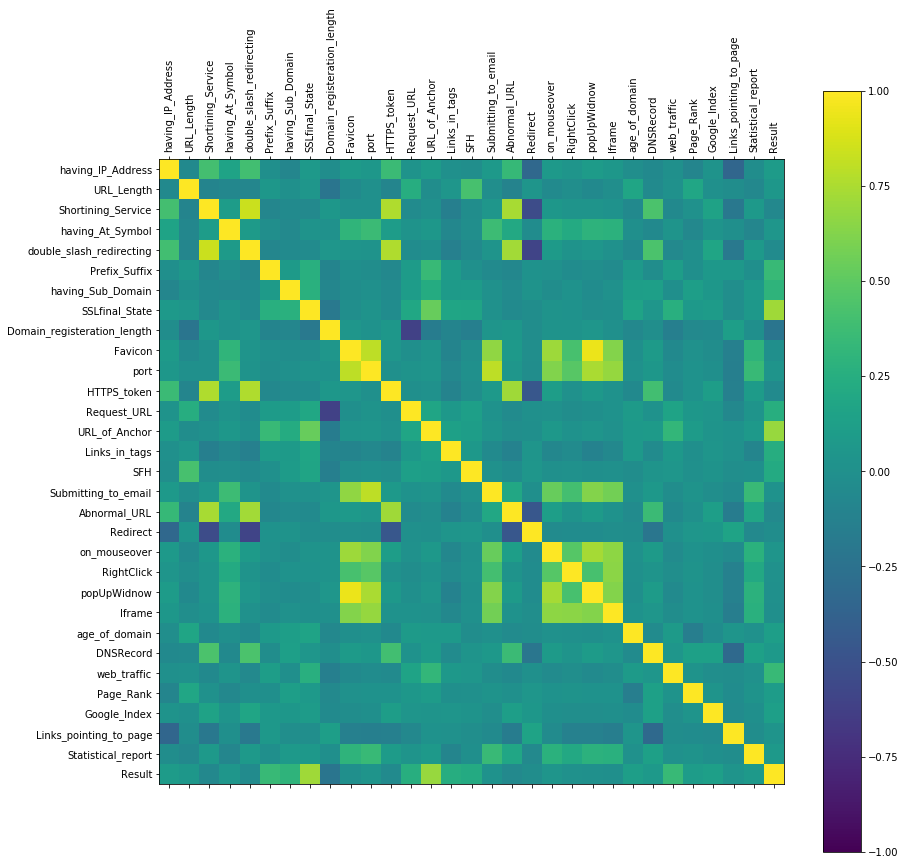

In [6]:
names = df.columns.values
correlations = df.corr()
# plot correlation matrix
fig=plt.figure(figsize=(14,14))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(names,)
ax.set_yticklabels(names)
plt.show()
fig.savefig("correlations_matrix.png")

In [7]:
correlation_scores=[]
features = df.columns[0:num_features-1]
for i in features:
    correlation_scores.append(df.Result.corr(df[i]))

In [8]:
max_index = np.argmax(correlation_scores)
print(features[max_index],"has maximum correaltion witht the target:",correlation_scores[max_index])

SSLfinal_State has maximum correaltion witht the target: 0.7147411951750116


# Decision Tree Model
A Decision Tree model is used to determine whether a website is Legitimate or Phishy 
Given that the all of the data is categorigal


In [9]:
## The Decision Tree model using the entire dataframe. 
target = 'Result'
features_list = features.tolist()
dt_data = df[features]

X = dt_data.values
y = (df[target]==1)*1

## Creating training and testing data for the model
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=.75)

# Finding Optimal Parameters Using Grid Search

GridSearch used to find the best specified parameters for the decision tree model. It goes through each combination of the parameters and reports back the setting with the best score. Also GridSearchCV performs a 3-fold cross validated model for each combination. The max

In [10]:
## The GridSearchCV

parameters = {'min_samples_leaf':np.arange(1,20,2),'min_samples_split':np.arange(2,20,2)}

tree = DecisionTreeClassifier(criterion='entropy')
clf = grid_search.GridSearchCV(tree, parameters)
clf.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

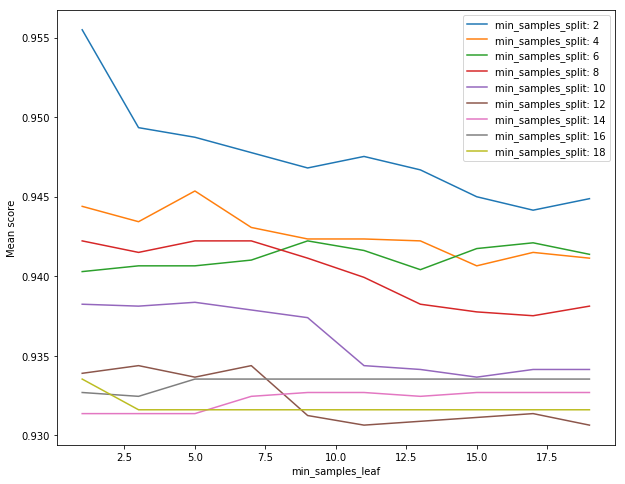

In [11]:
## Plotting the scores 
scores = [x[1] for x in clf.grid_scores_]
scores = np.array(scores).reshape(len(parameters['min_samples_split']), len(parameters['min_samples_leaf']))

fig= plt.figure(figsize=(10,8))

for ind, i in enumerate(parameters['min_samples_split']):
    plt.plot(parameters['min_samples_leaf'], scores[ind], label='min_samples_split: ' + str(i))
plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean score')
plt.show()
fig.savefig("accuracies.png")

In [12]:
print("Best Score for model: ", clf.best_score_)
print("Best Parameters for model: ", clf.best_params_)

Best Score for model:  0.9554939090580147
Best Parameters for model:  {'min_samples_leaf': 1, 'min_samples_split': 2}


In [13]:
## Training model using the best parameters as determined from the GridSearchCV
tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=1, min_samples_split=2)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
tree.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

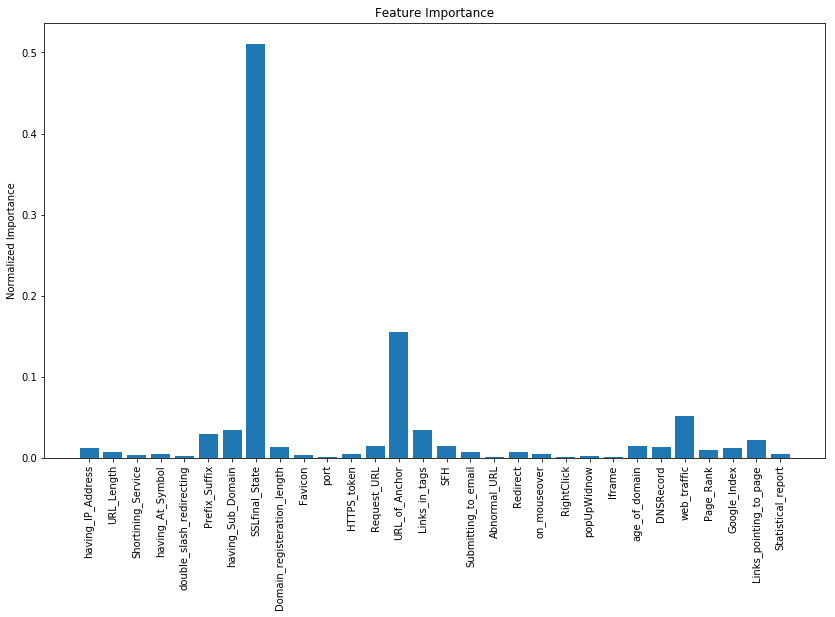

In [15]:
## Looking at the feature importance 
importances = tree.feature_importances_

fig =plt.figure(figsize=(14,8))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances)
plt.xticks(range(X_train.shape[1]),features_list, rotation=90)

plt.ylabel('Normalized Importance')
fig.savefig("feature_importance.png")

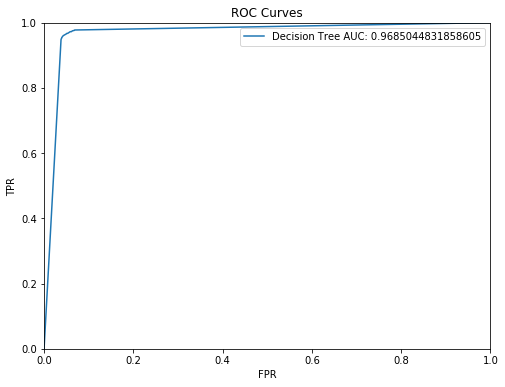

In [16]:
## auc_roc curve indexed 0
fprs = []
tprs = []
auc_scores = []
labels = ['Decision Tree AUC: ']

fpr, tpr, thresholds = roc_curve(Y_test, tree.predict_proba(X_test)[:,1])

fprs.append(fpr)
tprs.append(tpr)
auc_scores.append(roc_auc_score(Y_test, tree.predict_proba(X_test)[:,1]))
fig=plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label =labels[0] + str(auc_scores[0]))

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curves")
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
fig.savefig("auc_decision_tree.png")

# Random Forest Model

Decision tree classifiers can overfit the data which can lead to false positive and an inaccurate model. We attempted to plot the decsision surface for the decision tree classifier. Due to the number of features (30) the decision surface would not provide an accurate representation of the distribution of the data into the classes. So instead the decision tree classifier was compared to a Random Forest. Random Forest is a robust classifier that is a collection of decision tree and aggregates the trees into a final result. This reduces overfitting and variance. By comparing the two models we would decide which model represented the data more accurately.

In [17]:
## The Decision Tree model using the entire dataframe. 
target = 'Result'
features_list = features.tolist()
dt_data = df[features]

X = dt_data.values
y = (df[target]==1)*1

## Creating training and testing data for the model
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=.75)

In [18]:
# Using Grid search to extract the best parameters for the decision tree
parameters = {'min_samples_leaf':np.arange(1,20,2),'min_samples_split':np.arange(2,20,2)}

forest = RandomForestClassifier(criterion='entropy')
clf = grid_search.GridSearchCV(forest, parameters)
clf.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]), 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

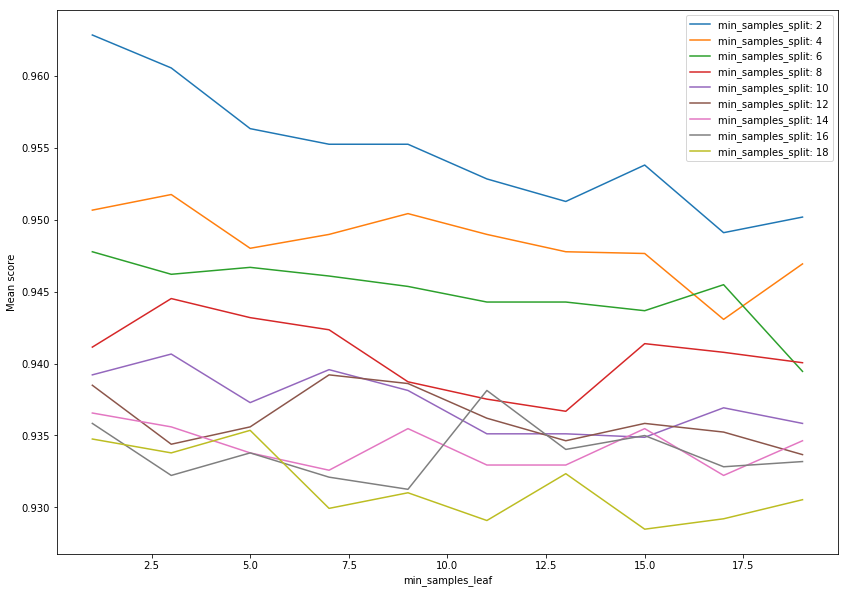

In [19]:
## Plotting the mean AUC scores from the cross validation 
scores = [x[1] for x in clf.grid_scores_]
scores = np.array(scores).reshape(len(parameters['min_samples_split']), len(parameters['min_samples_leaf']))

fig=plt.figure(figsize=(14,10))

for ind, i in enumerate(parameters['min_samples_split']):
    plt.plot(parameters['min_samples_leaf'], scores[ind], label='min_samples_split: ' + str(i))
plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel('Mean score')
plt.show()

In [20]:
print("Best Score for model: ", clf.best_score_)
print("Best Parameters for model: ", clf.best_params_)

Best Score for model:  0.9628512845253889
Best Parameters for model:  {'min_samples_leaf': 1, 'min_samples_split': 2}


In [21]:
## Building the classifier based on the paramters from the Grid Search
forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf=1, min_samples_split=2)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

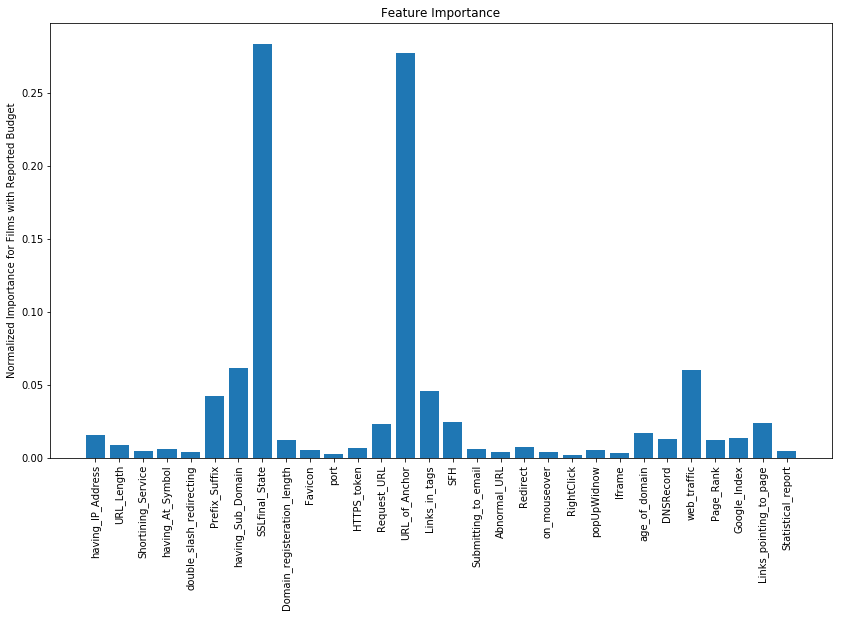

In [22]:
## Looking at the feature importance as determined by the classifier
importances = forest.feature_importances_
fig=plt.figure(figsize=(14,8))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances)
plt.xticks(range(X_train.shape[1]),features_list, rotation=90)

plt.ylabel('Normalized Importance for Films with Reported Budget')
fig.savefig("feature_importfance_rf.png")

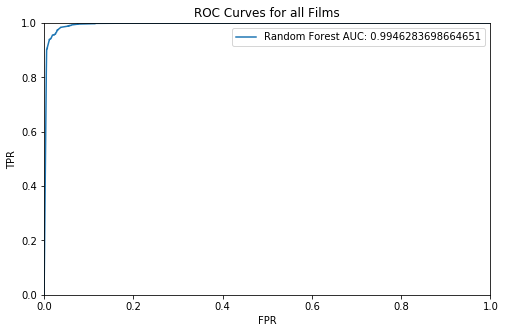

In [23]:
## Plotting the ROC Curve for the Classifier and the AUC score
fpr, tpr, thresholds = roc_curve(Y_test, forest.predict_proba(X_test)[:,1])

fprs.append(fpr)
tprs.append(tpr)
labels.append('Random Forest AUC: ')
auc_scores.append(roc_auc_score(Y_test, forest.predict_proba(X_test)[:,1]))
fig=plt.figure(figsize=(8,5))

plt.plot(fpr, tpr, label =labels[1]+ str(auc_scores[1]))

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curves for all Films")
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
fig.savefig("auc_rf.png")

# Comparing the Decision Tree with the Random Forest

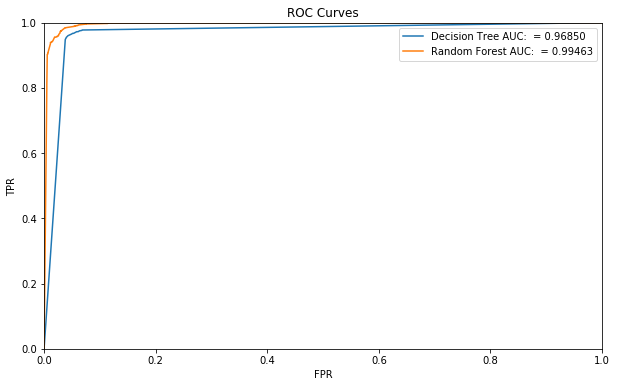

In [24]:
## Comparing the Models ROC Curve and AUC score trained on the entire data set
fig=plt.figure(figsize=(10,6))
for fpr, tpr, label, score in zip(fprs, tprs, labels, auc_scores): 
    plt.plot(fpr, tpr, label=str(label )+' = %0.5f' %score)

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curves")
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()
fig.savefig("comparison.png")


Based on the ROC Curves and AUC score the Random Forest out performed the Decision tree classifier trained on sets of data.